# Pandas

Pandas es una biblioteca de código abierto, con licencia BSD, que proporciona estructuras de datos de alto rendimiento y fácil de usar y herramientas de análisis de datos para el lenguaje de programación Python.

Documentación: <a>http://pandas.pydata.org/</a>

### General

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# crear una serie
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [19]:
# crear un data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.920026,-0.926506,-1.511239,-1.364800
2013-01-02,0.957116,2.573524,-1.980140,0.691831
2013-01-03,-1.991318,0.136190,-0.229138,0.889236
2013-01-04,0.522233,0.977408,1.403671,-0.143843
2013-01-05,0.626827,0.399124,-1.187060,0.678774
2013-01-06,0.491869,0.294888,-1.948520,-1.796906


In [20]:
# otra forma de crear un data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [21]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [22]:
df.head()

,A,B,C,D
2013-01-01,-0.920026,-0.926506,-1.511239,-1.364800
2013-01-02,0.957116,2.573524,-1.980140,0.691831
2013-01-03,-1.991318,0.136190,-0.229138,0.889236
2013-01-04,0.522233,0.977408,1.403671,-0.143843
2013-01-05,0.626827,0.399124,-1.187060,0.678774


In [23]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
df.values

array([[-0.92002612, -0.92650567, -1.51123858, -1.36480019],
       [ 0.95711611,  2.5735238 , -1.98013973,  0.69183135],
       [-1.99131793,  0.13618951, -0.22913805,  0.88923555],
       [ 0.52223333,  0.97740783,  1.40367124, -0.14384275],
       [ 0.62682675,  0.39912425, -1.18706026,  0.67877415],
       [ 0.49186857,  0.2948875 , -1.94851959, -1.79690636]])

In [26]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.052217,0.575771,-0.908737,-0.174285
std,1.150572,1.158663,1.302199,1.154131
min,-1.991318,-0.926506,-1.980140,-1.796906
25%,-0.567052,0.175864,-1.839199,-1.059561
50%,0.507051,0.347006,-1.349149,0.267466
75%,0.600678,0.832837,-0.468619,0.688567
max,0.957116,2.573524,1.403671,0.889236


In [27]:
#transpuesta
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.920026,0.957116,-1.991318,0.522233,0.626827,0.491869
B,-0.926506,2.573524,0.136190,0.977408,0.399124,0.294888
C,-1.511239,-1.980140,-0.229138,1.403671,-1.187060,-1.948520
D,-1.364800,0.691831,0.889236,-0.143843,0.678774,-1.796906


### Selection

In [28]:
# obtener una columna de un dataframe
df['A']

2013-01-01   -0.920026
2013-01-02    0.957116
2013-01-03   -1.991318
2013-01-04    0.522233
2013-01-05    0.626827
2013-01-06    0.491869
Freq: D, Name: A, dtype: float64

In [29]:
# otra forma de obtener una columna
df.A

2013-01-01   -0.920026
2013-01-02    0.957116
2013-01-03   -1.991318
2013-01-04    0.522233
2013-01-05    0.626827
2013-01-06    0.491869
Freq: D, Name: A, dtype: float64

In [30]:
# seleccionar un rango
df[0:3]

,A,B,C,D
2013-01-01,-0.920026,-0.926506,-1.511239,-1.364800
2013-01-02,0.957116,2.573524,-1.980140,0.691831
2013-01-03,-1.991318,0.136190,-0.229138,0.889236


In [32]:
# rango de fechas
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.186635,1.515254,0.058476,-1.253583
2013-01-03,0.459807,-0.817526,0.860003,-0.640271
2013-01-04,0.250461,0.002478,0.935877,1.878372


In [35]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,1.425418,0.723775,-0.846641,1.396768
2013-01-02,0.186635,1.515254,0.058476,-1.253583
2013-01-03,0.459807,-0.817526,0.860003,-0.640271
2013-01-04,0.250461,0.002478,0.935877,1.878372
2013-01-05,0.122123,-0.795237,0.178938,-0.618400


In [37]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.459807,-0.817526,0.860003,-0.640271,two
2013-01-05,0.122123,-0.795237,0.178938,-0.618400,four


### Merging / Grouping / Shaping

In [56]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.358814,1.072489,-0.558027,0.030556
1,-0.439760,1.033232,-0.869027,-0.214668
2,0.678877,-1.839381,-1.863398,0.026162
3,-0.350753,0.760679,-1.200450,0.015494
4,0.143798,-0.539451,-0.282223,0.284354
5,0.053866,0.975213,1.566494,0.806805
6,0.973483,0.515953,1.091031,0.956352
7,1.323701,-0.072350,0.158485,-1.329256
8,-0.334388,-0.271272,-2.066154,1.342722
9,-0.364789,0.646543,-0.254256,1.137676


In [57]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [58]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,3.310893,-1.252057,0.582933,0.171101
1,0.485857,0.876541,2.421865,0.801558
2,-0.294904,-0.381451,0.383676,-0.478501
3,0.638401,-0.678663,-1.840087,0.366177
4,1.116991,0.196286,0.392794,0.194904
5,0.058005,-1.330866,1.031223,-1.632921
6,-0.793441,-1.215810,-1.256759,0.336036
7,-0.685305,-1.440372,-1.237171,2.550028
8,0.638401,-0.678663,-1.840087,0.366177


In [59]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,-1.345020,0.848567
1,bar,one,0.535689,3.522876
2,foo,two,1.387066,0.325409
3,bar,three,1.521912,-0.136079
4,foo,two,0.454845,-1.393165
5,bar,two,0.805361,0.301741
6,foo,one,-1.168638,-1.349220
7,foo,three,-1.269911,-0.043319


In [60]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,2.862963,3.688539
foo,-1.941657,-1.611728


In [61]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.535689  3.522876
    three  1.521912 -0.136079
    two    0.805361  0.301741
foo one   -2.513657 -0.500653
    three -1.269911 -0.043319
    two    1.841911 -1.067756

In [62]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,0.270107,-2.030927
1,one,B,foo,-0.922059,0.292529
2,two,C,foo,1.614787,0.099605
3,three,A,bar,-2.051801,1.624647
4,one,B,bar,-1.605097,-0.722432
5,one,C,bar,-1.074131,-0.165663
6,two,A,foo,-1.881594,-1.255799
7,three,B,foo,-0.384229,1.375909
8,one,C,foo,0.216358,0.379439
9,one,A,bar,0.227425,0.375512


### Time Series

In [72]:
# time period resampling
rng = pd.date_range('1/1/2017', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min', how='sum')

/home/jmoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


2017-01-01    26231
Freq: 5T, dtype: int64

In [73]:
rng = pd.date_range('1/1/2017', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2017-01-31    0.129561
2017-02-28   -0.386086
2017-03-31    0.455582
2017-04-30   -1.005258
2017-05-31   -1.210624
Freq: M, dtype: float64

In [74]:
ps = ts.to_period()
ps.to_timestamp()

2017-01-01    0.129561
2017-02-01   -0.386086
2017-03-01    0.455582
2017-04-01   -1.005258
2017-05-01   -1.210624
Freq: MS, dtype: float64

### Graficos

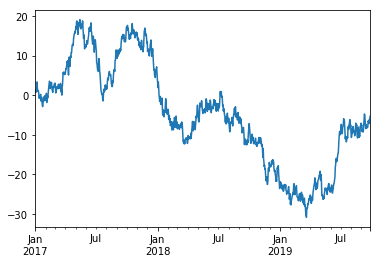

In [75]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2017', periods=1000))
ts = ts.cumsum()
ts.plot()

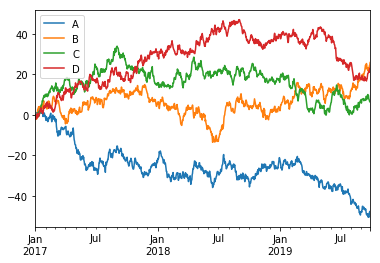

In [76]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Leer / escribir /csv/excel

In [13]:
# escribir un data frame en un fichero csv
df.to_csv('data-frame.csv', index=False)

In [14]:
# leer fichero csv
path = r'data-frame.csv'
newDf = pd.read_csv(path)
newDf.tail()

,A,B,C,D
1,-0.582057,-1.247209,1.345360,-0.294277
2,-1.206986,0.456277,1.575783,0.482871
3,-1.089964,1.695325,-1.125179,0.467373
4,-0.809351,1.383194,-0.657496,0.171323
5,0.617744,-0.189179,0.965267,-1.031498


In [15]:
# escribir un data frame en un excel
df.to_excel('data-frame.xlsx', sheet_name='Sheet1')

In [16]:
newDf2 = pd.read_excel('data-frame.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,A,B,C,D
2013-01-01,-1.321048,-1.293729,-1.069451,1.099776
2013-01-02,-0.582057,-1.247209,1.345360,-0.294277
2013-01-03,-1.206986,0.456277,1.575783,0.482871
2013-01-04,-1.089964,1.695325,-1.125179,0.467373
2013-01-05,-0.809351,1.383194,-0.657496,0.171323
